In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, classification_report

In [2]:
data=pd.read_csv('../data/Credit Card Customer Data.csv')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Preprocessing

In [3]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [4]:
data.duplicated().sum()

np.int64(0)

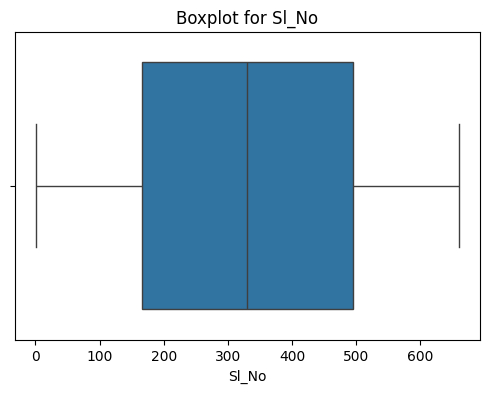

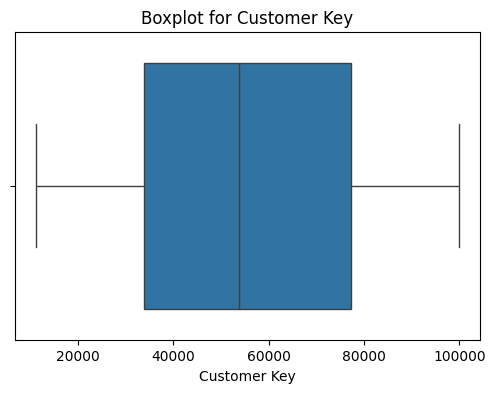

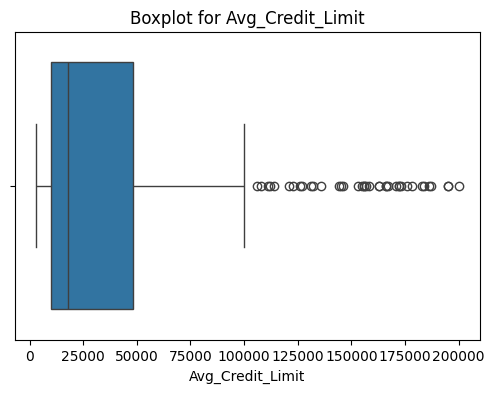

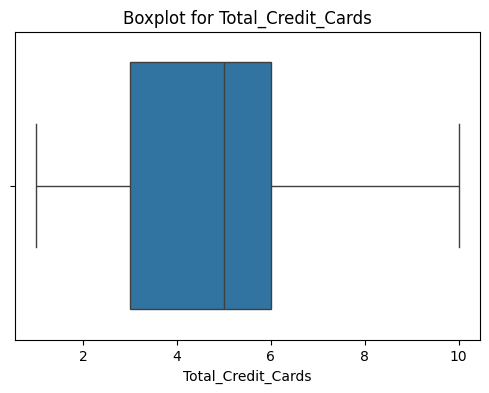

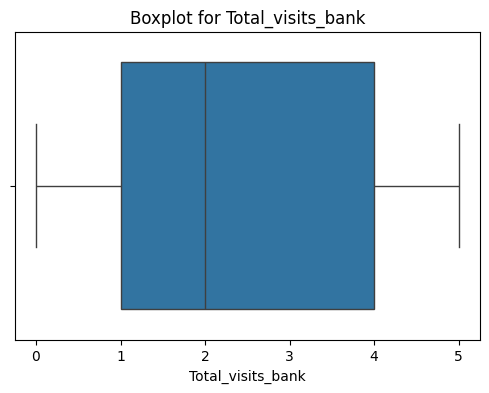

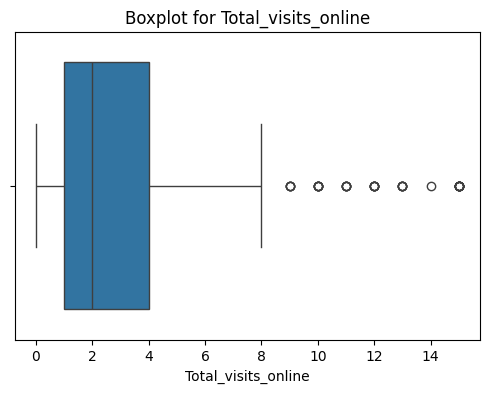

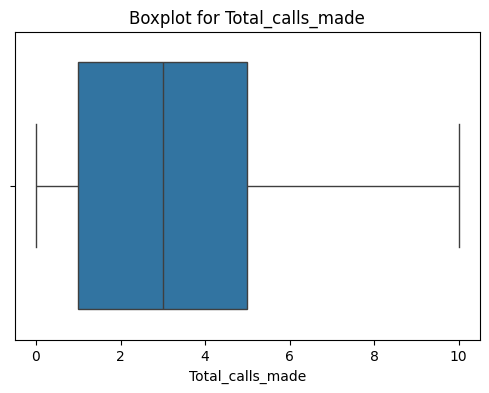

In [5]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [6]:
def handle_outliers_clip(data):
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)    
    return data

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                  1.0                 0  
1                  0                  8.5                 9  
2                  1                  3.0                 4  
3                  1                  1.0                 4  
4                  0                  8.5                 3  


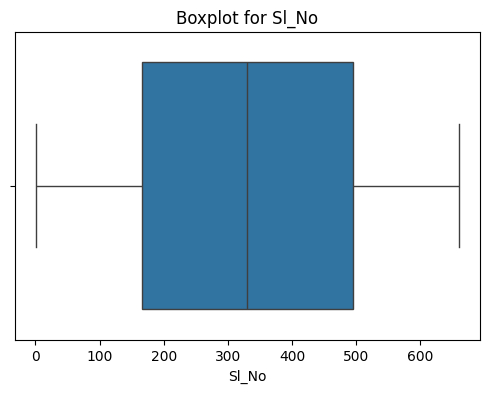

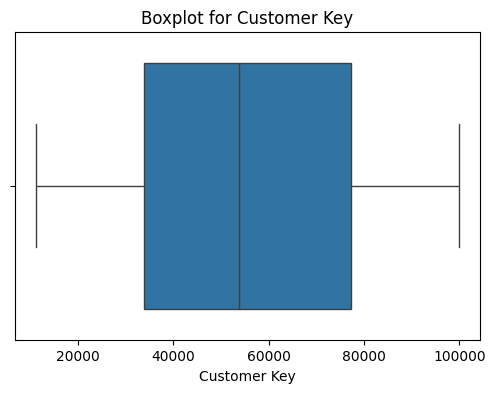

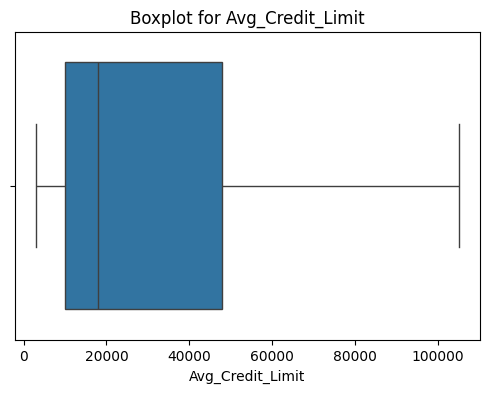

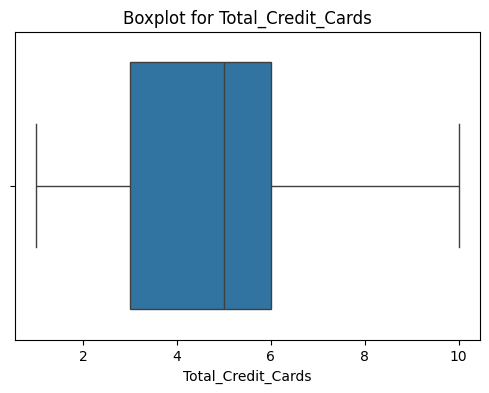

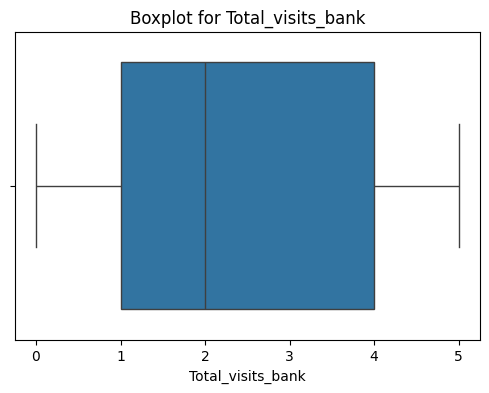

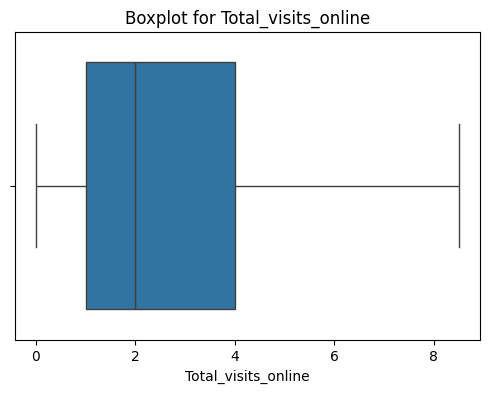

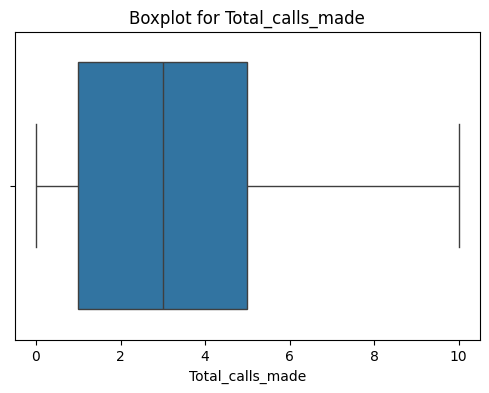

In [7]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### EDA

### Data Splitting

In [8]:
X = data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering

In [9]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Kmeans

In [10]:
### Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia is the sum of diff between centroid and corrsponding datapoint
    print('k:',i," wcss:",kmeans.inertia_)

k: 1  wcss: 535512680285.69977
k: 2  wcss: 125928150748.1939
k: 3  wcss: 49097476853.56804
k: 4  wcss: 20805813196.966793
k: 5  wcss: 13626281983.721155
k: 6  wcss: 7455893079.153473
k: 7  wcss: 5774114322.96431
k: 8  wcss: 4464834859.978197
k: 9  wcss: 3392552477.2216005
k: 10  wcss: 2737669375.161838


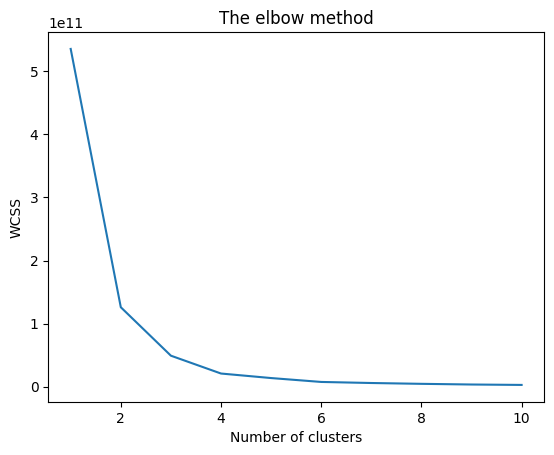

In [11]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [13]:
Y = data['KMeans_Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=0.3),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)   
    accuracy = accuracy_score(y_test, y_pred)   
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

Random Forest Classifier Accuracy: 100.00%
Logistic Regression Accuracy: 100.00%
SVM Accuracy: 100.00%
KNN Accuracy: 99.24%
Naive Bayes Accuracy: 100.00%
Decision Tree Accuracy: 100.00%
AdaBoost Accuracy: 100.00%
Gradient Boosting Accuracy: 100.00%
XGBoost Accuracy: 100.00%


# DBSCAN

In [15]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

In [16]:
Y = data['DBSCAN_Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    }

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)   
    accuracy = accuracy_score(y_test, y_pred)   
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

Random Forest Classifier Accuracy: 86.36%
Logistic Regression Accuracy: 15.15%


# Agglomerative Clustering

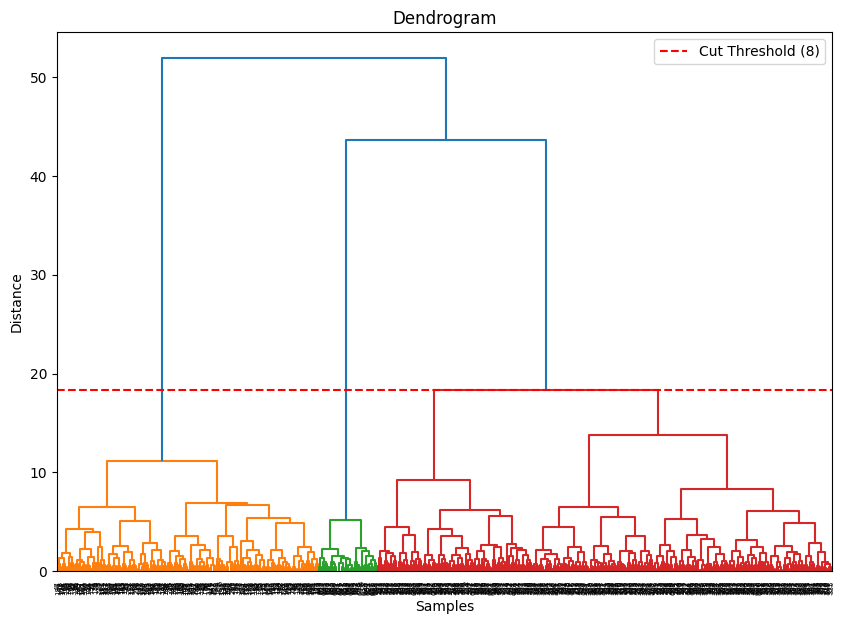

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
dend = dendrogram(linkage_matrix)

# Add a horizontal cut threshold
distance_gaps = np.diff(linkage_matrix[:, 2])
# Find the largest gap (indicating a significant jump in distance)
largest_gap_index = np.argmax(distance_gaps)
optimal_y = linkage_matrix[largest_gap_index, 2]

plt.axhline(optimal_y, color='r', linestyle='--', label='Cut Threshold (8)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [19]:
agg_clust = AgglomerativeClustering(n_clusters=3)  
data['Agglomerative_Cluster'] = agg_clust.fit_predict(X_scaled)

In [20]:
Y = data['Agglomerative_Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=0.3),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)   
    accuracy = accuracy_score(y_test, y_pred)   
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

Random Forest Classifier Accuracy: 99.24%
Logistic Regression Accuracy: 100.00%
SVM Accuracy: 96.97%
KNN Accuracy: 99.24%
Naive Bayes Accuracy: 100.00%
Decision Tree Accuracy: 100.00%
AdaBoost Accuracy: 100.00%
Gradient Boosting Accuracy: 99.24%
XGBoost Accuracy: 99.24%


### Evaluate with silhouette scores

In [22]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X_scaled, data['KMeans_Cluster'])
agg_clust_silhouette = silhouette_score(X_scaled, data['Agglomerative_Cluster'])
dbscan_silhouette = silhouette_score(X_scaled, data['DBSCAN_Cluster'])

print(f'Silhouette Score (KMeans): {kmeans_silhouette}')
print(f'Silhouette Score (Agglomerative): {agg_clust_silhouette}')
print(f'Silhouette Score (DBSCAN): {dbscan_silhouette}')

Silhouette Score (KMeans): 0.5172480049319457
Silhouette Score (Agglomerative): 0.517065019487537
Silhouette Score (DBSCAN): -0.02351708209005612


In [23]:
# END